In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys 
sys.path.insert(0, '../src/')
import jsm_halopull
import jsm_stats
import corner
import pygtc

In [22]:
mass = np.load("../../data/perfect-MW-analog/acc_mass_10k.npy")
red = np.load("../../data/perfect-MW-analog/acc_redshift_10k.npy")
surv_mask = np.load("../../data/perfect-MW-analog/surv_mask_10k.npy")

In [23]:
surv_mass = np.ma.filled(np.ma.masked_array(mass, mask=~surv_mask),fill_value=np.nan)
zero_mask = np.argwhere(np.isnan(surv_mass).all(axis=1)).flatten() # to fix the dead runs
surv_mass = np.delete(surv_mass, zero_mask, axis=0)
red = np.delete(red, zero_mask, axis=0)
#np.save("../../data/perfect-MW-analog/surv_mass_10k.npy", surv_mass)

In [24]:
surv_mass = np.log10(surv_mass[:,1:]) # to get rid of the host halo mass
red = red[:,1:]
surv_mass.shape

(10510, 1999)

In [5]:
delete = surv_mass.shape[0] - 10100
delete_spill = np.random.choice(range(surv_mass.shape[0]), delete, replace=False)

surv_mass = np.delete(surv_mass, delete_spill, axis=0)
red = np.delete(red, delete_spill, axis=0)

In [6]:
Nsamp = 100
Nsaga = int(surv_mass.shape[0]/Nsamp) #dividing by the number of samples to get the number of SAGA surveys

In [7]:
SAGA_split_mass = np.split(surv_mass, Nsaga)
SAGA_split_red = np.split(red, Nsaga)

host_ids = np.arange(surv_mass.shape[0])

In [8]:
Nsub = []
M_acc = []
z_acc = []
SAGA_id = []
tree_id = []
sat_id = []

for isaga in range(Nsaga):
    for itree in range(Nsamp):
        Nsub_i = np.argwhere(~np.isnan(SAGA_split_mass[isaga][itree]))[:,0]
        for j, isat in enumerate(Nsub_i):
            Nsub.append(len(Nsub_i))
            SAGA_id.append(isaga)
            tree_id.append(itree+1)
            sat_id.append(j+1)
            M_acc.append(SAGA_split_mass[isaga][itree][isat])
            z_acc.append(SAGA_split_red[isaga][itree][isat])

In [9]:
data = Table([sat_id, tree_id, SAGA_id, Nsub, M_acc, z_acc], names=("sat_id", "tree_id", "SAGA_id", "Nsub", "M_acc", "z_acc"))
#data.write("../../data/perfect-MW-analog/101_SAGA_samples.dat")
data

sat_id,tree_id,SAGA_id,Nsub,M_acc,z_acc
int64,int64,int64,int64,float64,float64
1,1,0,238,8.31288691959396,0.017398746855025325
2,1,0,238,8.51316413193678,0.030740407989695993
3,1,0,238,8.958255957142162,0.035245056648130636
4,1,0,238,8.454606311168527,0.035245056648130636
5,1,0,238,8.533706417165762,0.05355973930933444
6,1,0,238,8.162913018984792,0.05355973930933444
7,1,0,238,8.255860458439095,0.06289961159998311
8,1,0,238,9.231466385304424,0.06289961159998311
9,1,0,238,8.608039202046559,0.07236503277627311


In [10]:
def plot_single_realization(file, nhalo=100):

    tree = np.load(file)

    mass = tree["mass"]
    time = tree["CosmicTime"]

    colors = cm.viridis(np.linspace(0, 1, nhalo))

    plt.figure(figsize=(6,6))

    for i in range(nhalo):
        plt.plot(time, mass[i+100], color=colors[i])

    plt.plot(time, mass[0], color="red")
    plt.xlabel("Gyr", fontsize=15)
    plt.ylabel("halo mass (M$_{\odot}$)", fontsize=15)
    plt.yscale("log")
    plt.axhline(10**8, ls="--", color="black")
    #plt.ylim(1e6,1e14)
    plt.show()

In [12]:
#plot_single_realization("../../data/test_evo/tree_2257_evo.npz")

In [ ]:
# jsm_serial.evolve("../../data/test_evo/mass_res/", evo_mode="arbres")

In [13]:
well = jsm_halopull.Realizations("../../data/test_evo/mass_res/", 1e8)
well.grab_mass()

well.files

number of realizations: 5
number of branches/subhalos: 1600


['../../data/test_evo/mass_res/tree_og_2257_evo.npz',
 '../../data/test_evo/mass_res/tree_arbres2_2257_evo.npz',
 '../../data/test_evo/mass_res/tree_arbres0_2257_evo.npz',
 '../../data/test_evo/mass_res/tree_arbres1_2257_evo.npz',
 '../../data/test_evo/mass_res/tree_arbres3_2257evo.npz']

In [14]:
mass = np.load("../../data/test_evo/mass_res/acc_mass.npy")
red = np.load("../../data/test_evo/mass_res/acc_redshift.npy")
surv_mask = np.load("../../data/test_evo/mass_res/surv_mask.npy")

In [15]:
surv_mass = np.ma.filled(np.ma.masked_array(mass, mask=~surv_mask),fill_value=np.nan)
zero_mask = np.argwhere(np.isnan(surv_mass).all(axis=1)).flatten() # to fix the dead runs
surv_mass = np.delete(surv_mass, zero_mask, axis=0)
red = np.delete(red, zero_mask, axis=0)

In [16]:
np.sum(~np.isnan(surv_mass),axis=1)

array([189, 188, 185, 181, 190])

In [17]:
wow = Table.read("../../../Downloads/Raw_Data.dat", format="ascii")
wow

col1,col2,col3,col4,col5
int64,int64,float64,float64,float64
1,15,21784047600.0,0.196973443,6.66914654
1,45,18793547800.0,0.525610685,6.62395763
1,61,12695452700.0,0.678429186,7.18635273
1,140,7825305090.0,2.05244875,6.63559484
2,11,7410935810.0,0.0868052915,6.62853861
2,59,21560848400.0,0.617736042,7.28419352
2,78,22148366300.0,0.933082521,8.67235088
3,3,440961434000.0,0.0262646861,9.5215807
3,15,62666743800.0,0.237746909,7.3316803


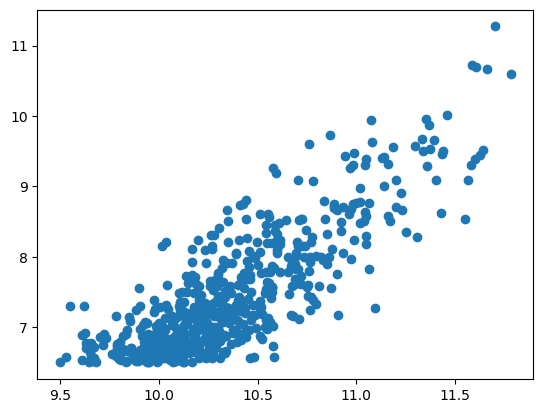

In [18]:
plt.scatter(np.log10(wow["col3"]), wow["col5"])

In [19]:
trees, counts = np.unique(wow["col1"].value, return_counts=True)

lists = []
for i in range(100):
    index = np.where(wow["col1"] == trees[i])[0]
    lists.append(index)

lgMhs = []
lgMss = []
for i in lists:
    lgMhs.append(np.log10(wow["col3"][i].value))
    lgMss.append(wow["col5"][i].value)

In [20]:
from itertools import islice, repeat, chain


def pad(x):
    zeros = repeat(0)
    n = max(map(len, x))
    return [list(islice(chain(row, zeros), n)) for row in x]

In [21]:
lgMh = np.array(pad(lgMhs))
lgMs = np.array(pad(lgMss))
np.save("../../data/MCMC/SAGA_0_lgMh.npy", lgMh)
np.save("../../data/MCMC/SAGA_0_lgMs.npy", lgMs)

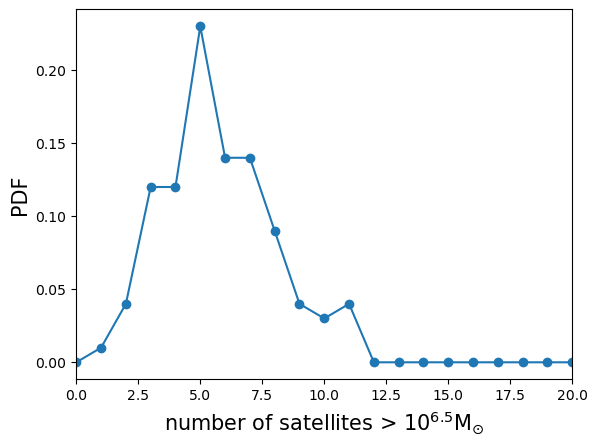

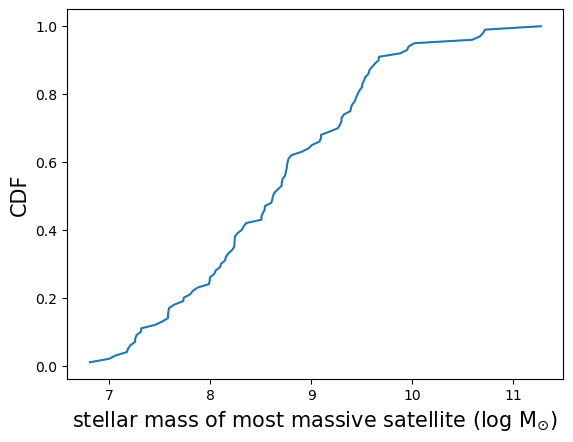

In [22]:
hmm = jsm_stats.SatStats(lgMs)
hmm.Nsat(6.5, plot=True)
hmm.Maxmass(plot=True)

In [25]:
final_step = Table.read("../../../Downloads/MCMC_step_1000.dat", format="ascii")
alphas = final_step["col1"].data
deltas = final_step["col2"].data
sigmas = final_step["col3"].data

last_sample_F = np.array([alphas, deltas, sigmas]).T
last_sample_F

In [33]:
samples = np.load("../../data/MCMC/sampler_results_sep17.npy")
last_sample = samples[-1,:,:]
fig = corner.corner(last_sample_F, show_titles=True, quantiles=[0.16, 0.5, 0.84], plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
fig = corner.corner(last_sample, show_titles=True, quantiles=[0.16, 0.5, 0.84], plot_contours=False)
figure = corner.corner(last_sample_F, plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
corner.corner(last_sample, fig=figure, color='red', plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
plt.show()

names = ['alpha', 'delta', 'sigma']

# Labels for the different chains
chainLabels = ["JSM results", "F vdB results"]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = ((1, 3), (-2, 1), (0, 3))

truths = [1.9, -0.2, 0.6]

GTC = pygtc.plotGTC(chains=[last_sample,last_sample_F], 
                    paramNames=names,
                    chainLabels=chainLabels,
                    truths=truths,
                    figureSize=8,
                    filledPlots=True)

